In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

TOTAL_DATASET_SIZE = 10887
TRAIN_SIZE = 10000 #Total dataset size is 10887
TEST_SIZE = TOTAL_DATASET_SIZE - TRAIN_SIZE

HOURS_IN_DAY = 24
START_YEAR = 2011
DAYS_IN_YEAR = 365
MONTH_DAYS = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
MONTHS_IN_YEAR = 12

In [46]:
def get_total_day_count(datetime):
    date,time = datetime.split(' ')
    year,month,day_of_month = date.split('-') #['yyyy', 'mm', 'dd']
    time_split = time.split(':') #['hh', 'mm', 'ss']
    day_count = (int(year) - START_YEAR)*DAYS_IN_YEAR + get_day_of_year(year,month,day_of_month)
    return day_count

def datetime_to_total_hours(datetime):
    date,time = datetime.split(' ')
    year,month,day_of_month = date.split('-') #['yyyy', 'mm', 'dd']
    time_split = time.split(':') #['hh', 'mm', 'ss']
    cont_time = (int(year) - START_YEAR)*DAYS_IN_YEAR*HOURS_IN_DAY + get_day_of_year(year,month,day_of_month)*HOURS_IN_DAY + int(time_split[0])
    return cont_time

def get_hour(datetime):
    _, time = datetime.split(' ')
    time_split = time.split(':')  # ['hh', 'mm', 'ss']
    return int(time_split[0])

def get_month(datetime):
    date, _ = datetime.split(' ')
    _,month,_ = date.split('-') #['yyyy', 'mm', 'dd']
    return int(month)

def get_day_of_month(datetime):
    date, _ = datetime.split(' ')
    _,_,day_of_month = date.split('-') #['yyyy', 'mm', 'dd']
    return int(day_of_month)

def get_day_of_year(year,month,day_of_month):
    day_count = 0
    if year == '2012':
        MONTH_DAYS[1] = 29
    for i in range(int(month)-1):
        day_count += MONTH_DAYS[i]
    return day_count + int(day_of_month) -1

def get_day_of_week(datetime):
    total_day_count = get_total_day_count(datetime)
    day_of_week = np.mod(total_day_count+5,7) #0-Monday,6-Sunday
    day_of_week = day_of_week*31*np.pi/(6*18) #Refactoring day_of_week from 0-6 to 0-(31/18*PI) to make it possible to place days of week on circle
    return day_of_week

def get_humidity_impact(real_humidity):
    if(real_humidity >17):
        return real_humidity
    else:
        return 100-real_humidity
    
def get_month_impact(datetime):
    date, _ = datetime.split(' ')
    _,month,_ = date.split('-') #['yyyy', 'mm', 'dd']
    month=int(month)
    if month > 6 and month <= 10:
        month = 6 
    elif month > 10:
        month = 6 - (month - 10)
    return month

def get_hour_impact(datetime):
    _, time = datetime.split(' ')
    hour,_,_ = time.split(':')  # ['hh', 'mm', 'ss']
    #hours_impact = [55,33,20,10,7,20,70,210,340,190,130,150,185,180,170,180,240,390,370,270,195,145,110,75]
    return hours_impact[int(hour)]

def get_day_of_week(datetime):
    total_day_count = get_total_day_count(datetime)
    day_of_week = np.mod(total_day_count+5,7) #0-Monday,6-Sunday
    #day_of_week = day_of_week*31*np.pi/(6*18) #Refactoring day_of_week from 0-6 to 0-(31/18*PI) to make it possible to place days of week on circle
    return day_of_week

In [47]:
df = pd.read_csv('data/train.csv')

#Adding continous time as variable because of the increasing amount of bikes over time
#Adding day count to group data of one day(avg or sum) because plotting each hour is too messy
#Consider adding day of the week
df['cont_time'] = df.datetime.apply(datetime_to_total_hours)
df['hour'] = df.datetime.apply(get_hour)
df['month'] = df.datetime.apply(get_month)
df['month2'] = df.datetime.apply(get_month_impact)
df['day_of_month'] = df.datetime.apply(get_day_of_month)
df['humidity2'] = df.humidity.apply(get_humidity_impact)
#df['day_count'] = df.datetime.apply(get_total_day_count)
#df = df.drop('datetime',1)
hours_impact = np.array(df.groupby('hour')['count'].mean())
df['hour_impact'] = df.datetime.apply(get_hour_impact)
df['day_of_week'] = df.datetime.apply(get_day_of_week)

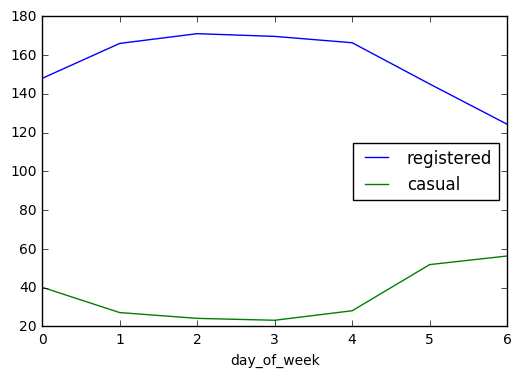

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,cont_time,hour,month,month2,day_of_month,humidity2,hour_impact,day_of_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,0,1,1,1,81,55.138462,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1,1,1,80,33.859031,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,2,1,1,1,80,22.899554,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,3,1,1,1,75,11.757506,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,4,1,1,1,75,6.407240,5
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,5,1,1,1,75,19.767699,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,6,1,1,1,80,76.259341,5
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,7,1,1,1,86,213.116484,5
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,8,1,1,1,75,362.769231,5
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,9,9,1,1,1,76,221.780220,5


In [48]:
a = df.groupby('day_of_week')['registered','casual'].mean()
a.plot()
plt.show()
df.head(10)

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64


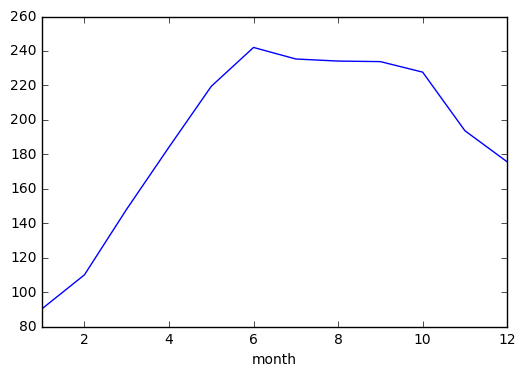

In [49]:
a = df.groupby('month')['count'].mean()
print(a)
a.plot()
plt.show()

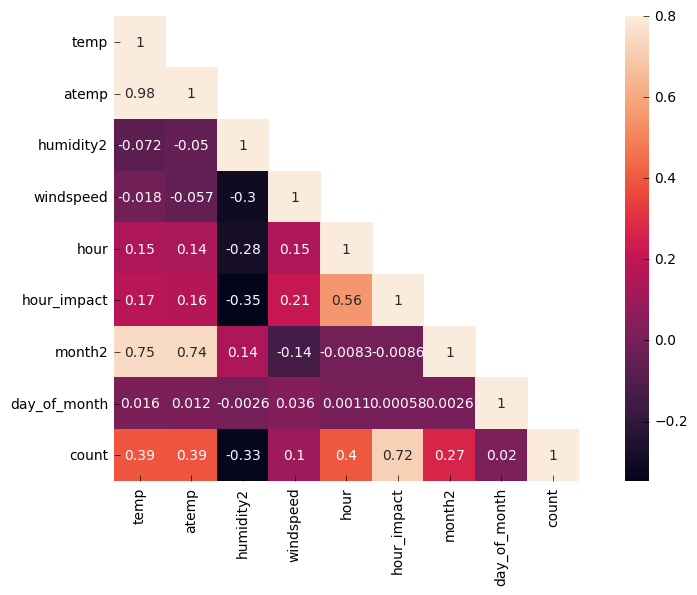

In [50]:
corrMatt = df[["temp","atemp","humidity2","windspeed",'hour','hour_impact','month2','day_of_month',"count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(12,6)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

      registered     casual       count
hour                                   
0      44.826374  10.312088   55.138462
1      27.345815   6.513216   33.859031
2      18.080357   4.819196   22.899554
3       9.076212   2.681293   11.757506
4       5.144796   1.262443    6.407240
5      18.311947   1.455752   19.767699
6      72.109890   4.149451   76.259341
7     202.202198  10.914286  213.116484
8     341.226374  21.542857  362.769231
9     190.824176  30.956044  221.780220
10    128.973626  46.118681  175.092308
11    150.621978  60.052747  210.674725
12    187.677632  68.831140  256.508772
13    183.728070  74.059211  257.787281
14    166.853070  76.589912  243.442982
15    178.269737  76.028509  254.298246
16    241.289474  75.083333  316.372807
17    393.324561  75.440789  468.765351
18    369.462719  61.396930  430.859649
19    266.203947  49.074561  315.278509
20    191.785088  36.732456  228.517544
21    144.802632  28.567982  173.370614
22    110.973684  22.603070  133.576754


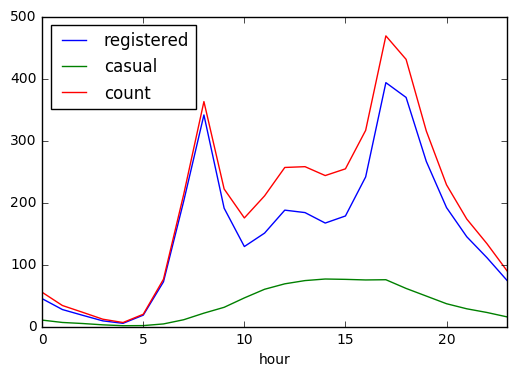

In [51]:
a = df.groupby('hour')[['registered','casual','count']].mean()

#a = np.array(df.groupby('hour')['count'].mean())
print(a)
a.plot()
plt.show()

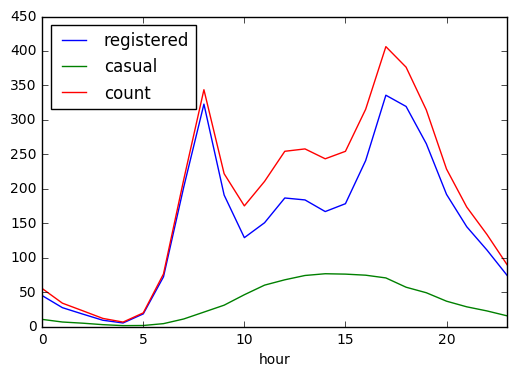

In [52]:
a = df[np.abs(df["count"]-df["count"].mean())<=(3*df["count"].std())]
a.groupby('hour')[['registered','casual','count']].mean().plot()
#print(a.shape)
#a.head(50)
plt.show()

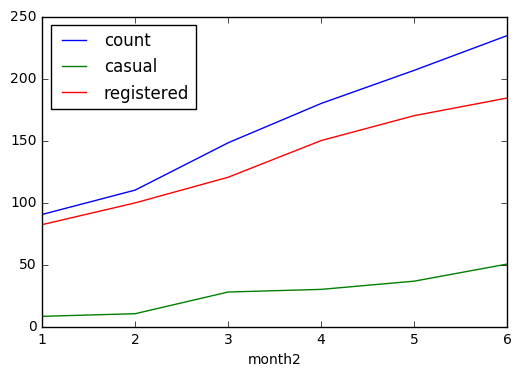

In [53]:
df.groupby('month2')[['count','casual','registered']].mean().plot()
plt.show()

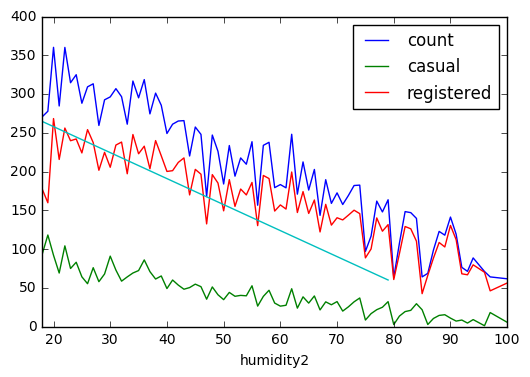

In [54]:
df.groupby('humidity2')[['count','casual','registered']].mean().plot()
lin = np.linspace(325,60,80)
plt.plot(lin)
plt.show()

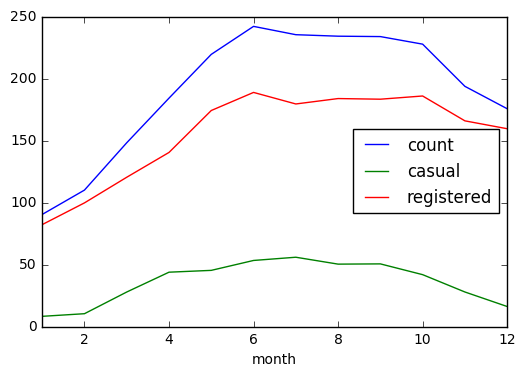

In [55]:
df.groupby('month')[['count','casual','registered']].mean().plot()
plt.show()

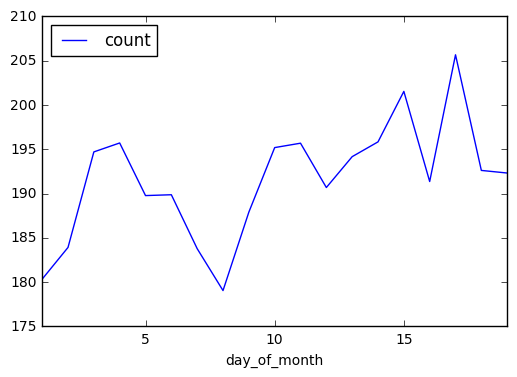

In [56]:
df.groupby('day_of_month')[['count']].mean().plot()
plt.show()

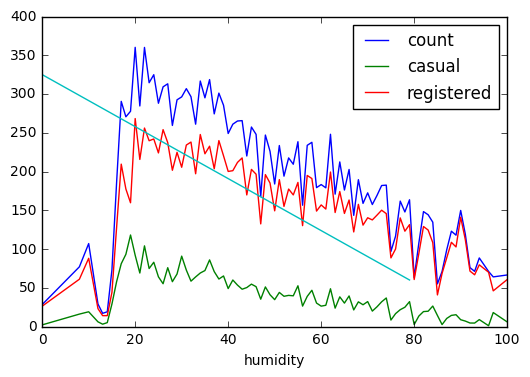

In [57]:
df.groupby('humidity')[['count','casual','registered']].mean().plot()
lin = np.linspace(325,60,80)
plt.plot(lin)
plt.show()

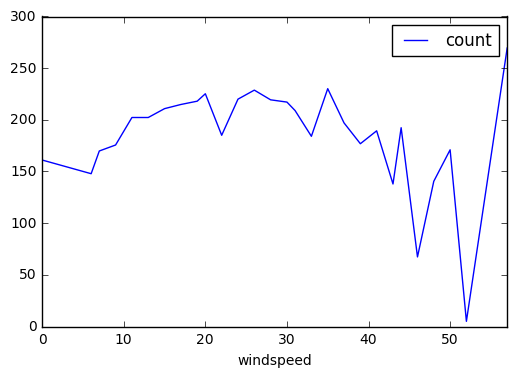

In [58]:
df.groupby('windspeed')[['count']].mean().plot()
plt.show()

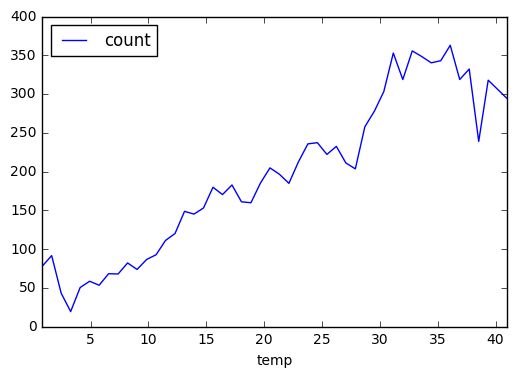

In [59]:
df.groupby('temp')[['count']].mean().plot()
plt.show()

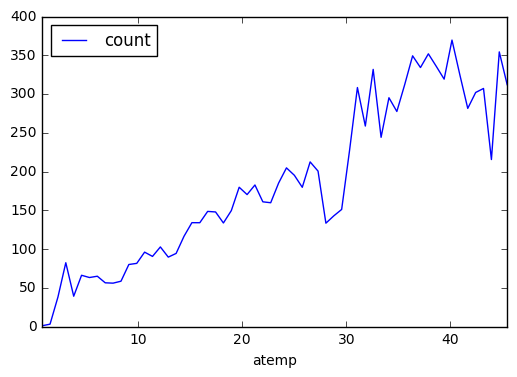

In [60]:
df.groupby('atemp')[['count']].mean().plot()
plt.show()

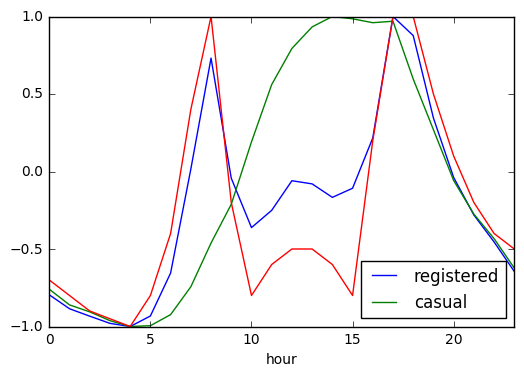

In [61]:
#df['hour3'] = df.hour.apply(lambda x: x+24 if x < 5 else x)
df['registered'] = (df['registered'] - df['registered'].min() - (df['registered'].max() - df['registered'].min())/2) / ((df['registered'].max() - df['registered'].min())/2)
df['casual'] = (df['casual'] - df['casual'].min() - (df['casual'].max() - df['casual'].min())/2) / ((df['casual'].max() - df['casual'].min())/2)
df['diff'] = df['registered']-df['casual']
#print(df['casual'].max(),df['casual'].min(),df['registered'].max(),df['registered'].min())
a = df.groupby('hour')[['registered','casual']].mean()
a = (a  - a .min() - (a .max() - a .min())/2) / ((a .max() - a .min())/2)
a.plot()
#print(a)
hours_peak = [-0.7,-0.8,-0.9,-0.95,-1,-0.8,-0.4,0.4,1,-0.2,-0.8,-0.6,-0.5,-0.5,-0.6,-0.8,0.2,1,1,0.5,0.1,-0.2,-0.4,-0.5,-0.6]
plt.plot(hours_peak)
plt.show()

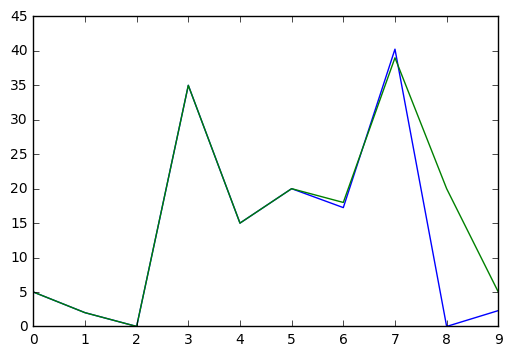

In [62]:
points = [5,2,0,35,15,20,18,39,20,5]
points2 = [5,2,0,35,15,20,18,39,20,5]
for i,p in enumerate(points):
    points2[i] = p
    if i > 5:
        points2[i] = points[5-(i-5)]*1.15
plt.plot(points2)
plt.plot(points)


plt.show()

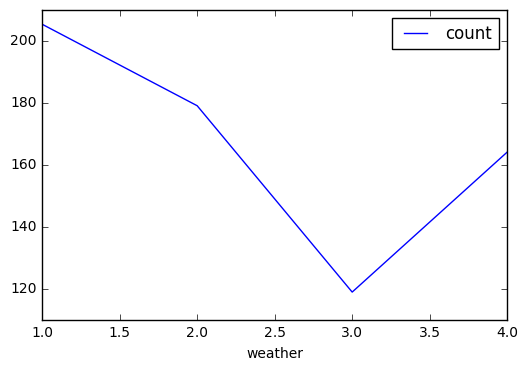

In [63]:
df.groupby('weather')[['count']].mean().plot()
plt.show()

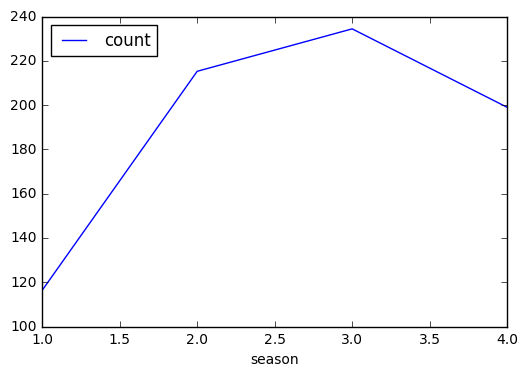

In [64]:
df.groupby('season')[['count']].mean().plot()
plt.show()

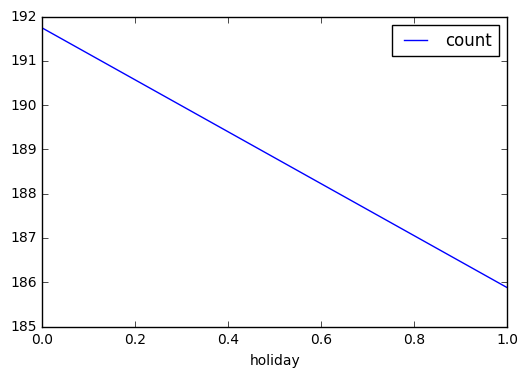

In [65]:
df.groupby('holiday')[['count']].mean().plot()
plt.show()